# Book Recommendation system collaborative filtering using Pearson correlation

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

reading data sets - we have 2 data sets BX-Book-Ratings, BX-Books, BX-Users

In [11]:
books = pd.read_csv('C:\\python\\Recommeder_system_datasets\\BX-Books.csv', sep=';',error_bad_lines = False, encoding = 'latin-1')
books.head()

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [12]:
books.shape

(271360, 8)

In [13]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [15]:
users = pd.read_csv('C:\\python\\Recommeder_system_datasets\\BX-Users.csv', sep=';',error_bad_lines = False, encoding = 'latin-1')
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [16]:
users.shape

(278858, 3)

In [17]:
ratings = pd.read_csv('C:\\python\\Recommeder_system_datasets\\BX-Book-Ratings.csv', sep=';',error_bad_lines = False, encoding = 'latin-1')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [18]:
ratings.shape

(1149780, 3)

Explorating data visualization with rating value itself Vs rating count

In [59]:
ratings['Book-Rating'].value_counts(sort=False)

0     716109
1       1770
2       2759
3       5996
4       8904
5      50974
6      36924
7      76457
8     103736
9      67541
10     78610
Name: Book-Rating, dtype: int64

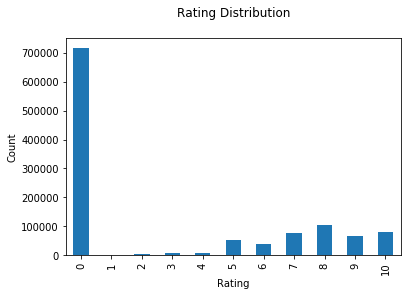

In [60]:
ratings['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

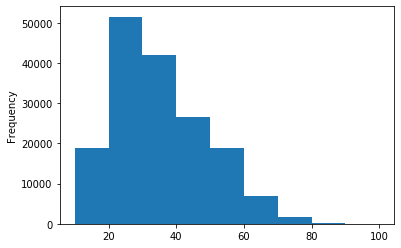

In [61]:
users.Age.plot(kind = 'hist', bins = [10,20,30,40,50,60,70,80,90,100])

see most of the people that gave ratings are between age 25 to 40

recommendation based on rating count

In [86]:
rating_rec = pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].count())
rating_rec.head()
rating_rate_sorted = rating_rec.sort_values('Book-Rating', ascending = False).reset_index()
rating_pop = rating_rate_sorted.head()
rating_pop

,ISBN,Book-Rating
0,0971880107,2502
1,0316666343,1295
2,0385504209,883
3,0060928336,732
4,0312195516,723


The book with ISBN “0971880107” received the most rating counts. Let’s find out what book it is, and what books are in the top 5.

In [98]:
books[books.ISBN=='0971880107'], ['Book-Title','Book-Author']

TypeError: __init__() got an unexpected keyword argument 'header'

lets print the name of the 10 most popular books and the authors

In [117]:
rating_pop['ISBN']
data = []
for i in rating_pop['ISBN']:
            row = dict(zip(books[books.ISBN==i]['Book-Title'],books[books.ISBN==i]['Book-Author']))
            data.append(row)
data   
#rec_books = pd.DataFrame(data)
#rec_books

[{'Wild Animus': 'Rich Shapero'},
 {'The Lovely Bones: A Novel': 'Alice Sebold'},
 {'The Da Vinci Code': 'Dan Brown'},
 {'Divine Secrets of the Ya-Ya Sisterhood: A Novel': 'Rebecca Wells'},
 {'The Red Tent (Bestselling Backlist)': 'Anita Diamant'}]

In [115]:
or u can print the rows of the books datadrame corresponding to the ISBN

array(<map object at 0x0000020F50F02E08>, dtype=object)

In [118]:
pd.merge(books, rating_pop['ISBN'], on = 'ISBN')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...
3,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
4,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...


Recommendations based on correlations
We use Pearsons’R correlation coefficient to measure the linear correlation between two variables, in our case, the ratings for two books.

First, we need to find out the average rating, and the number of ratings each book received.

In [132]:
rate_ave = pd.DataFrame({'average':ratings.groupby('ISBN')['Book-Rating'].mean()})
rate_ave.reset_index().head()

,ISBN,average
0,0330299891,3.0
1,0375404120,1.5
2,0586045007,0.0
3,9022906116,3.5
4,9032803328,0.0


In [139]:
rate_ave['total_count'] = ratings.groupby('ISBN')['Book-Rating'].count()
rate_ave.sort_values('total_count',ascending=False).head()

,average,total_count
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


Observations: In this data set, the book that received the most rating counts was not highly rated at all. As a result, if we were to use recommendations based on rating counts, we would definitely make mistakes here. So, we need to have a better system.

To ensure statistical significance, users with less than 200 ratings, and books with less than 100 ratings are excluded.

In [194]:
count1 = ratings['User-ID'].value_counts()
count1.index
count1.values
rating_ver2 = ratings[ratings['User-ID'].isin(count1[count1 >= 200].index)].drop('average', axis=1)
rating_ver2

,User-ID,ISBN,Book-Rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0
...,...,...,...
1147612,275970,3829021860,0
1147613,275970,4770019572,0
1147614,275970,896086097,0
1147615,275970,9626340762,8


In [195]:
count2 = ratings.groupby('ISBN')['Book-Rating'].count()
count2.index
count2.values
count2
ratings[ratings['ISBN'].isin(count2[count2 >= 100].index)]
rating_ver2 = ratings[ratings['ISBN'].isin(count2[count2 >= 100].index)].drop('average', axis=1)
rating_ver2

,User-ID,ISBN,Book-Rating
2,276727,0446520802,0
8,276744,038550120X,7
10,276746,0425115801,0
11,276746,0449006522,0
12,276746,0553561618,0
...,...,...,...
1149749,276690,0064400557,0
1149761,276704,0345386108,6
1149768,276704,0446605409,0
1149771,276704,0743211383,7


creating the pivot table with ISBN as columns, user Id as rows

In [214]:
df_pivot = rating_ver2.pivot_table(index ='User-ID',columns = 'ISBN', values='Book-Rating').fillna(0)
df_pivot

ISBN,002542730X,0060008032,0060096195,006016848X,0060173289,0060175400,006019491X,0060199652,0060391626,0060392452,...,1558744630,1558745157,1559029838,1573225517,1573225789,1573227331,1573229326,1573229571,1592400876,1878424319
User-ID,,,,,,,,,,,,,,,,,,,,,
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278843,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [215]:
book_recs = df_pivot['0385504209']
book_recs

User-ID
9         0.0
14        0.0
16        0.0
26        0.0
39        0.0
         ... 
278832    0.0
278836    0.0
278843    0.0
278844    0.0
278854    0.0
Name: 0385504209, Length: 32712, dtype: float64

In [230]:
similar_book = df_pivot.corrwith(book_recs)
corr_book = pd.DataFrame(similar_book, columns=['pearsonR'])
corr_book1 = corr_book.sort_values('pearsonR', ascending=False).head()
corr_book1

,pearsonR
ISBN,
0385504209,1.000000
0671027360,0.139058
0374199698,0.090211
0446531332,0.076457
0316666343,0.066832


In [232]:
#corr_book1.index
books[books['ISBN'].isin(corr_book1.index)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
118,0671027360,Angels &amp; Demons,Dan Brown,2001,Pocket Star,http://images.amazon.com/images/P/0671027360.0...,http://images.amazon.com/images/P/0671027360.0...,http://images.amazon.com/images/P/0671027360.0...
408,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
748,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
776,0446531332,Nights in Rodanthe,Nicholas Sparks,2002,Warner Books,http://images.amazon.com/images/P/0446531332.0...,http://images.amazon.com/images/P/0446531332.0...,http://images.amazon.com/images/P/0446531332.0...
21390,0374199698,Middlesex: A Novel,Jeffrey Eugenides,2002,"Farrar, Straus and Giroux",http://images.amazon.com/images/P/0374199698.0...,http://images.amazon.com/images/P/0374199698.0...,http://images.amazon.com/images/P/0374199698.0...


# Collaborative filtering using Nearest Neighbor

In [241]:
combine_book_rating = pd.merge(ratings, books, on='ISBN')
columns = ['Year-Of-Publication', 'Publisher', 'Book-Author', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()
combine_book_rating.shape

(1031136, 5)

In [ ]:
#grouping by title and then creating the count

In [244]:
book_rating_count = combine_book_rating.groupby('Book-Title')['Book-Rating'].count().reset_index()
book_rating_count.rename(columns = {'Book-Rating':'Rating_count'}, inplace=True)
book_rating_count.head()

,Book-Title,Rating_count
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [ ]:
combining the combine_book_rating with book_rating_count

In [247]:
combine_book_rating_ver1 = pd.merge(combine_book_rating,book_rating_count, on = 'Book-Title')
combine_book_rating_ver1.head()
combine_book_rating_ver1.shape

(1031136, 6)

In [249]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
book_rating_count['Rating_count'].describe()

count   241071.000
mean         4.277
std         16.739
min          1.000
25%          1.000
50%          1.000
75%          3.000
max       2502.000
Name: Rating_count, dtype: float64

The median book is rated only once. There is a problem in the dataset, let pick up different quantiles

In [250]:
book_rating_count['Rating_count'].quantile(np.arange(0.9,1,.01))

0.900    7.000
0.910    8.000
0.920    9.000
0.930   10.000
0.940   11.000
0.950   13.000
0.960   16.000
0.970   20.000
0.980   29.000
0.990   50.000
Name: Rating_count, dtype: float64

lets pick popularity threshold at 50

In [254]:
thres = 60
combine_book_rating_ver1 = combine_book_rating_ver1[combine_book_rating_ver1.Rating_count>=thres]
combine_book_rating_ver1.shape
#combine_book_rating_ver1.columns

(261200, 6)

Filters to US Users only

In [255]:
US_users = users[users.Location.str.contains('usa')]
US_users.shape

(139971, 3)

merging the combine_book_rating_ver1 and us users

In [257]:
usa_combine_book_rating_ver1 = pd.merge(combine_book_rating_ver1,US_users, on='User-ID')
usa_combine_book_rating_ver1.shape

(203887, 8)

In [258]:
usa_combine_book_rating_ver1.head()

,User-ID,ISBN,Book-Rating,average,Book-Title,Rating_count,Location,Age
0,276725,034545104X,0,nan,Flesh Tones: A Novel,60,"tyler, texas, usa",nan
1,2313,034545104X,5,nan,Flesh Tones: A Novel,60,"cincinnati, ohio, usa",23.000
2,2313,0812533550,9,nan,Ender's Game (Ender Wiggins Saga (Paperback)),249,"cincinnati, ohio, usa",23.000
3,2313,0399146431,5,nan,The Bonesetter's Daughter,384,"cincinnati, ohio, usa",23.000
4,2313,0060173289,9,nan,Divine Secrets of the Ya-Ya Sisterhood : A Novel,130,"cincinnati, ohio, usa",23.000


In [259]:
usa_combine_book_rating_ver1.drop(columns = ['average','Age'],axis=1, inplace = True)
usa_combine_book_rating_ver1.head()

,User-ID,ISBN,Book-Rating,Book-Title,Rating_count,Location
0,276725,034545104X,0,Flesh Tones: A Novel,60,"tyler, texas, usa"
1,2313,034545104X,5,Flesh Tones: A Novel,60,"cincinnati, ohio, usa"
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),249,"cincinnati, ohio, usa"
3,2313,0399146431,5,The Bonesetter's Daughter,384,"cincinnati, ohio, usa"
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,130,"cincinnati, ohio, usa"


#creating pivot table from usa_combine_book_rating_ver1

In [260]:
piv = usa_combine_book_rating_ver1.pivot_table(index='Book-Title', columns = 'User-ID', values = 'Book-Rating').fillna(0)
piv.head()

User-ID,9,14,16,17,23,26,32,39,42,44,...,278819,278820,278824,278828,278832,278836,278843,278844,278851,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
16 Lighthouse Road,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1984,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1st to Die: A Novel,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2010: Odyssey Two,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


creating a 2D array matrix from pivot table

In [261]:
from scipy.sparse import csr_matrix
us_matrix = csr_matrix(piv.values)
us_matrix

<1934x33441 sparse matrix of type '<class 'numpy.float64'>'
	with 79615 stored elements in Compressed Sparse Row format>

Using Nearest Neighbors with cosine similarity

In [263]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [264]:
#piv.shape[0]. dataframe.shape gives the output in a tuple from which we are choosing the first element
book_query_index = np.random.choice(piv.shape[0])
book_query_index

435

In [265]:
piv.iloc[book_query_index,:].values.reshape(1,-1)
#values.reshape(-1,-1) will give a 2 D array of only the ratings of the specific movie

array([[0., 0., 0., ..., 0., 0., 0.]])

In [266]:
distances = model_knn.kneighbors(piv.iloc[book_query_index,:].values.reshape(1, -1), n_neighbors = 6)
distances

(array([[0.        , 0.79366763, 0.8368773 , 0.85150224, 0.87834335,
         0.88475908]]),
 array([[ 435,  288,  436,  659, 1105, 1097]], dtype=int64))

In [267]:
distances[1].ravel()
#this will get us the index and we can find the book

array([ 435,  288,  436,  659, 1105, 1097], dtype=int64)

In [269]:
x = 0
for i in distances[1].ravel():
    if x == 0:
        pass
    else:    
        print(x,':',' ',usa_combine_book_rating_ver1.iloc[i,3],'with a distance of','', distances[0].ravel()[x])
    x = x+1

1 :   The Temple of My Familiar with a distance of  0.793667633691892
2 :   Envy with a distance of  0.8368772986130394
3 :   Geek Love with a distance of  0.8515022434162481
4 :   Guardian with a distance of  0.878343352375444
5 :   Thicker Than Water with a distance of  0.8847590777425456
